<a href="https://colab.research.google.com/github/Subhr74/Git-files/blob/master/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
enrol_files = [
    "/content/aadhar hackathon/api_data_aadhar_enrolment_0_500000.csv",
    "/content/aadhar hackathon/api_data_aadhar_enrolment_500000_1000000.csv",
    "/content/aadhar hackathon/api_data_aadhar_enrolment_1000000_1006029.csv",
]

enrol_list = []
for path in enrol_files:
    df_part = pd.read_csv(path, header=None)
    enrol_list.append(df_part)

df_enrol_raw = pd.concat(enrol_list, ignore_index=True)

df_enrol_raw.head()


/tmp/ipython-input-2457106288.py:9: DtypeWarning: Columns (3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_part = pd.read_csv(path, header=None)
/tmp/ipython-input-2457106288.py:9: DtypeWarning: Columns (3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_part = pd.read_csv(path, header=None)


,0,1,2,3,4,5,6
0,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
1,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
2,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
3,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
4,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15


In [6]:
df_enrol_raw.columns = [
    "date", "state", "district", "pincode",
    "age05", "age517", "age18greater"
]

df_enrol_raw = df_enrol_raw.iloc[1:].copy()
df_enrol_raw["date"] = pd.to_datetime(df_enrol_raw["date"], dayfirst=True, errors='coerce')
df_enrol_raw["pincode"] = df_enrol_raw["pincode"].astype(str)

df_enrol_raw.head()
df_enrol_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006030 entries, 2 to 1006031
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   date          1006028 non-null  datetime64[ns]
 1   state         1006030 non-null  object        
 2   district      1006030 non-null  object        
 3   pincode       1006030 non-null  object        
 4   age05         1006030 non-null  object        
 5   age517        1006030 non-null  object        
 6   age18greater  1006030 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 53.7+ MB


In [8]:
# convert age columns to numeric first
df_enrol_raw["age05"] = pd.to_numeric(df_enrol_raw["age05"], errors='coerce').fillna(0).astype(int)
df_enrol_raw["age517"] = pd.to_numeric(df_enrol_raw["age517"], errors='coerce').fillna(0).astype(int)
df_enrol_raw["age18greater"] = pd.to_numeric(df_enrol_raw["age18greater"], errors='coerce').fillna(0).astype(int)

# total daily enrolment
df_enrol_raw["enrol_total"] = (
    df_enrol_raw["age05"] + df_enrol_raw["age517"] + df_enrol_raw["age18greater"]
)

# month key
df_enrol_raw["month"] = df_enrol_raw["date"].dt.to_period("M").dt.to_timestamp()

# aggregate to district–month
enrol_month = (
    df_enrol_raw
    .groupby(["state", "district", "month"], as_index=False)[["enrol_total"]]
    .sum()
)

enrol_month.head()

,state,district,month,enrol_total
0,100000,100000,2025-09-01,12
1,100000,100000,2025-10-01,1
2,100000,100000,2025-11-01,11
3,100000,100000,2025-12-01,194
4,Andaman & Nicobar Islands,Andamans,2025-09-01,27


In [9]:
demo_files = [
    "/content/aadhar hackathon/api_data_aadhar_demographic_0_500000.csv",
    "/content/aadhar hackathon/api_data_aadhar_demographic_500000_1000000.csv",
    "/content/aadhar hackathon/api_data_aadhar_demographic_1000000_1500000.csv",
    "/content/aadhar hackathon/api_data_aadhar_demographic_1500000_2000000.csv",
    "/content/aadhar hackathon/api_data_aadhar_demographic_2000000_2071700.csv",
]

demo_list = []
for path in demo_files:
    df_part = pd.read_csv(path, header=None)
    demo_list.append(df_part)

df_demo_raw = pd.concat(demo_list, ignore_index=True)

df_demo_raw.head()


/tmp/ipython-input-2538405705.py:11: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_part = pd.read_csv(path, header=None)
/tmp/ipython-input-2538405705.py:11: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_part = pd.read_csv(path, header=None)
/tmp/ipython-input-2538405705.py:11: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_part = pd.read_csv(path, header=None)
/tmp/ipython-input-2538405705.py:11: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_part = pd.read_csv(path, header=None)


,0,1,2,3,4,5
0,date,state,district,pincode,demo_age_5_17,demo_age_17_
1,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
2,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
3,01-03-2025,Gujarat,Rajkot,360006,65,765
4,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314


In [11]:
df_demo_raw.columns = [
    "date", "state", "district", "pincode",
    "demo_age517", "demo_age18greater" # Corrected to 6 columns
]

df_demo_raw = df_demo_raw.iloc[1:].copy() # Remove header row after column assignment
df_demo_raw["date"] = pd.to_datetime(df_demo_raw["date"], dayfirst=True, errors='coerce')
df_demo_raw["pincode"] = df_demo_raw["pincode"].astype(str)

# Convert available age columns to numeric
df_demo_raw["demo_age517"] = pd.to_numeric(df_demo_raw["demo_age517"], errors="coerce").fillna(0).astype(int)
df_demo_raw["demo_age18greater"] = pd.to_numeric(df_demo_raw["demo_age18greater"], errors="coerce").fillna(0).astype(int)

# Calculate demo_total using only the available age columns
df_demo_raw["demo_total"] = (
    df_demo_raw["demo_age517"] + df_demo_raw["demo_age18greater"]
)

df_demo_raw["month"] = df_demo_raw["date"].dt.to_period("M").dt.to_timestamp()

demo_month = (
    df_demo_raw
    .groupby(["state", "district", "month"], as_index=False)[["demo_total"]]
    .sum()
)

demo_month.head()

,state,district,month,demo_total
0,100000,100000,2025-12-01,2
1,Andaman & Nicobar Islands,Andamans,2025-09-01,162
2,Andaman & Nicobar Islands,Andamans,2025-10-01,75
3,Andaman & Nicobar Islands,Andamans,2025-11-01,212
4,Andaman & Nicobar Islands,Andamans,2025-12-01,301


In [12]:
bio_files = [
    "/content/aadhar hackathon/api_data_aadhar_biometric_0_500000.csv",
    "/content/aadhar hackathon/api_data_aadhar_biometric_500000_1000000.csv",
    "/content/aadhar hackathon/api_data_aadhar_biometric_1000000_1500000.csv",
    "/content/aadhar hackathon/api_data_aadhar_biometric_1500000_1861108.csv",
]

bio_list = []
for path in bio_files:
    df_part = pd.read_csv(path, header=None)
    bio_list.append(df_part)

df_bio_raw = pd.concat(bio_list, ignore_index=True)

df_bio_raw.head()


/tmp/ipython-input-355835789.py:10: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_part = pd.read_csv(path, header=None)
/tmp/ipython-input-355835789.py:10: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_part = pd.read_csv(path, header=None)
/tmp/ipython-input-355835789.py:10: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_part = pd.read_csv(path, header=None)
/tmp/ipython-input-355835789.py:10: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_part = pd.read_csv(path, header=None)


,0,1,2,3,4,5
0,date,state,district,pincode,bio_age_5_17,bio_age_17_
1,01-03-2025,Haryana,Mahendragarh,123029,280,577
2,01-03-2025,Bihar,Madhepura,852121,144,369
3,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
4,01-03-2025,Bihar,Bhojpur,802158,256,980


In [14]:
df_bio_raw.columns = [
    "date", "state", "district", "pincode",
    "bio_age517", "bio_age18greater" # Corrected to 6 columns
]

df_bio_raw = df_bio_raw.iloc[1:].copy() # Remove header row after column assignment
df_bio_raw["date"] = pd.to_datetime(df_bio_raw["date"], dayfirst=True, errors='coerce')
df_bio_raw["pincode"] = df_bio_raw["pincode"].astype(str)

# Convert available age columns to numeric
df_bio_raw["bio_age517"] = pd.to_numeric(df_bio_raw["bio_age517"], errors="coerce").fillna(0).astype(int)
df_bio_raw["bio_age18greater"] = pd.to_numeric(df_bio_raw["bio_age18greater"], errors="coerce").fillna(0).astype(int)

# Calculate bio_total using only the available age columns
df_bio_raw["bio_total"] = (
    df_bio_raw["bio_age517"] + df_bio_raw["bio_age18greater"]
)

df_bio_raw["month"] = df_bio_raw["date"].dt.to_period("M").dt.to_timestamp()

bio_month = (
    df_bio_raw
    .groupby(["state", "district", "month"], as_index=False)[["bio_total"]]
    .sum()
)

bio_month.head()

,state,district,month,bio_total
0,Andaman & Nicobar Islands,Andamans,2025-03-01,209
1,Andaman & Nicobar Islands,Andamans,2025-04-01,184
2,Andaman & Nicobar Islands,Andamans,2025-05-01,180
3,Andaman & Nicobar Islands,Andamans,2025-06-01,140
4,Andaman & Nicobar Islands,Andamans,2025-07-01,259


In [15]:
df_month = enrol_month.merge(
    demo_month, on=["state","district","month"], how="outer"
).merge(
    bio_month, on=["state","district","month"], how="outer"
)

df_month[["enrol_total","demo_total","bio_total"]] = (
    df_month[["enrol_total","demo_total","bio_total"]].fillna(0)
)

df_month.head()
df_month.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703 entries, 0 to 8702
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   state        8703 non-null   object        
 1   district     8703 non-null   object        
 2   month        8703 non-null   datetime64[ns]
 3   enrol_total  8703 non-null   float64       
 4   demo_total   8703 non-null   float64       
 5   bio_total    8703 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 408.1+ KB


In [16]:
nat = (
    df_month
    .groupby("month")[["enrol_total","demo_total","bio_total"]]
    .sum()
    .reset_index()
)

nat.head()


,month,enrol_total,demo_total,bio_total
0,2025-03-01,16473.0,11147558.0,8322222.0
1,2025-04-01,257438.0,1515672.0,8641679.0
2,2025-05-01,183616.0,1566287.0,7879956.0
3,2025-06-01,215734.0,1685562.0,7899289.0
4,2025-07-01,616868.0,2220715.0,9792552.0


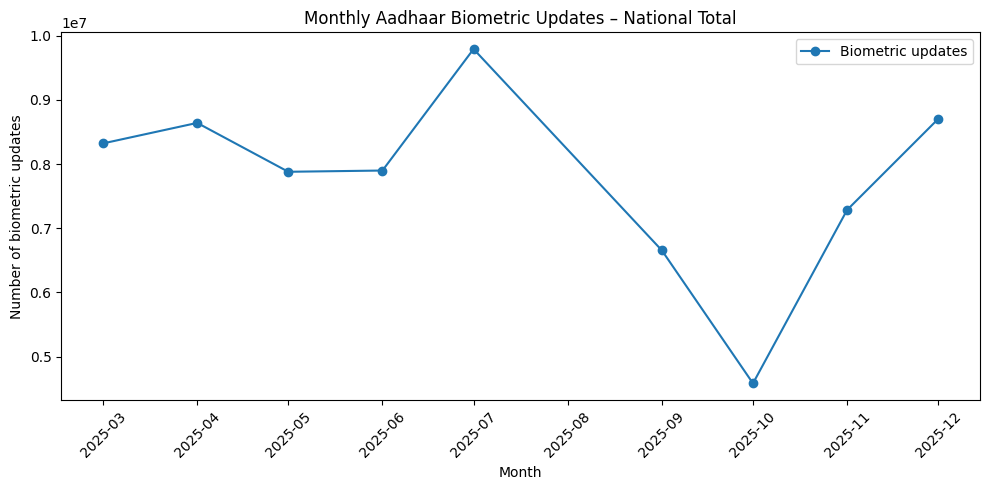

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(10,5))
plt.plot(nat["month"], nat["bio_total"], marker="o", label="Biometric updates")
plt.title("Monthly Aadhaar Biometric Updates – National Total")
plt.xlabel("Month")
plt.ylabel("Number of biometric updates")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.savefig("fig1_monthly_trend.png", dpi=300, bbox_inches="tight")


In [22]:
group = df_month.groupby(["state","district"])["bio_total"]
df_month["bio_mu"] = group.transform("mean")
df_month["bio_sigma"] = group.transform("std").replace(0, np.nan)

df_month["bio_z"] = (
    (df_month["bio_total"] - df_month["bio_mu"]) / df_month["bio_sigma"]
)

df_month["bio_anomaly_flag"] = df_month["bio_total"] > (
    df_month["bio_mu"] + 2 * df_month["bio_sigma"]
)
df_month["bio_anomaly_flag"] = df_month["bio_anomaly_flag"].fillna(False)

df_month[["state","district","month","bio_total","bio_mu","bio_sigma","bio_z","bio_anomaly_flag"]].head()

,state,district,month,bio_total,bio_mu,bio_sigma,bio_z,bio_anomaly_flag
0,100000,100000,2025-09-01,0.0,0.000000,NaN,NaN,False
1,100000,100000,2025-10-01,0.0,0.000000,NaN,NaN,False
2,100000,100000,2025-11-01,0.0,0.000000,NaN,NaN,False
3,100000,100000,2025-12-01,0.0,0.000000,NaN,NaN,False
4,Andaman & Nicobar Islands,Andamans,2025-03-01,209.0,223.888889,63.30767,-0.235183,False


In [23]:
# Drop dummy state rows (state == "100000")
df_month_clean = df_month[df_month["state"] != "100000"].copy()

# Recompute anomaly metrics on cleaned data
group_clean = df_month_clean.groupby(["state", "district"])["bio_total"]

df_month_clean["bio_mu"] = group_clean.transform("mean")
df_month_clean["bio_sigma"] = group_clean.transform("std").replace(0, np.nan)

df_month_clean["bio_z"] = (
    (df_month_clean["bio_total"] - df_month_clean["bio_mu"]) /
    df_month_clean["bio_sigma"]
)

df_month_clean["bio_anomaly_flag"] = df_month_clean["bio_total"] > (
    df_month_clean["bio_mu"] + 2 * df_month_clean["bio_sigma"]
)
df_month_clean["bio_anomaly_flag"] = df_month_clean["bio_anomaly_flag"].fillna(False)

df_month_clean[[
    "state","district","month","bio_total","bio_mu","bio_sigma","bio_z","bio_anomaly_flag"
]].head()


,state,district,month,bio_total,bio_mu,bio_sigma,bio_z,bio_anomaly_flag
4,Andaman & Nicobar Islands,Andamans,2025-03-01,209.0,223.888889,63.30767,-0.235183,False
5,Andaman & Nicobar Islands,Andamans,2025-04-01,184.0,223.888889,63.30767,-0.630080,False
6,Andaman & Nicobar Islands,Andamans,2025-05-01,180.0,223.888889,63.30767,-0.693263,False
7,Andaman & Nicobar Islands,Andamans,2025-06-01,140.0,223.888889,63.30767,-1.325098,False
8,Andaman & Nicobar Islands,Andamans,2025-07-01,259.0,223.888889,63.30767,0.554611,False


In [24]:
top10_volume = (
    df_month_clean
    .sort_values("bio_total", ascending=False)
    [["state","district","month","bio_total"]]
    .head(10)
)

top10_volume


,state,district,month,bio_total
4653,Maharashtra,Pune,2025-12-01,89018.0
4613,Maharashtra,Nashik,2025-07-01,83938.0
4649,Maharashtra,Pune,2025-07-01,83000.0
4616,Maharashtra,Nashik,2025-11-01,82610.0
4729,Maharashtra,Thane,2025-12-01,82274.0
4728,Maharashtra,Thane,2025-11-01,80050.0
4614,Maharashtra,Nashik,2025-09-01,75403.0
4725,Maharashtra,Thane,2025-07-01,74661.0
4617,Maharashtra,Nashik,2025-12-01,71247.0
4648,Maharashtra,Pune,2025-06-01,69249.0


In [25]:
# All anomaly rows (bio_total > mean + 2 * std)
anomalies = df_month_clean[df_month_clean["bio_anomaly_flag"]].copy()

# Sort by anomaly strength
anomalies = anomalies.sort_values("bio_z", ascending=False)[
    ["state","district","month","bio_total","bio_z","enrol_total","demo_total"]
]

anomalies.head(20)


,state,district,month,bio_total,bio_z,enrol_total,demo_total
1366,Chandigarh,Chandigarh,2025-07-01,32547.0,2.628532,0.0,11580.0
5059,Mizoram,Serchhip,2025-03-01,4123.0,2.610401,0.0,1364.0
589,Arunachal Pradesh,Shi-yomi,2025-11-01,233.0,2.589196,21.0,111.0
469,Arunachal Pradesh,Dibang Valley,2025-11-01,192.0,2.577047,1.0,49.0
8148,Uttarakhand,Haridwar,2025-12-01,51061.0,2.568799,1021.0,16762.0
4973,Mizoram,Aizawl,2025-03-01,15783.0,2.568112,0.0,6020.0
8157,Uttarakhand,Nainital,2025-12-01,19776.0,2.558690,493.0,8832.0
8202,Uttarakhand,Udham Singh Nagar,2025-12-01,49352.0,2.553794,1156.0,17678.0
652,Arunachal Pradesh,West Siang,2025-11-01,1180.0,2.544149,44.0,492.0
4819,Manipur,Kakching,2025-07-01,786.0,2.510532,0.0,0.0


In [26]:
top10_volume.to_csv("top10_bio_volume.csv", index=False)
anomalies.head(20).to_csv("top20_bio_anomalies.csv", index=False)
df_month_clean.to_csv("district_month_panel.csv", index=False)


In [29]:
# National trend
plt.savefig("fig1_monthly_trend.png", dpi=300, bbox_inches="tight")

# Anomaly bar chart (after plotting top_anom)
plt.savefig("fig3_anomalies.png", dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>